# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

#1. Read CSV and load data

In [2]:
path1  = 'iris.csv'
df = pd.read_csv(path1)
print(df.shape)
print(df.variety.value_counts())
df.head()

(150, 5)
Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 2. shuffle

In [55]:
shuf_df =  df.sample(frac = 1,random_state=4).reset_index(drop=True)
print(shuf_df)

     sepal.length  sepal.width  petal.length  petal.width     variety
0             6.4          2.8           5.6          2.1   Virginica
1             5.7          3.8           1.7          0.3      Setosa
2             7.4          2.8           6.1          1.9   Virginica
3             7.6          3.0           6.6          2.1   Virginica
4             7.3          2.9           6.3          1.8   Virginica
..            ...          ...           ...          ...         ...
145           7.0          3.2           4.7          1.4  Versicolor
146           6.3          2.3           4.4          1.3  Versicolor
147           6.5          3.0           5.8          2.2   Virginica
148           7.2          3.0           5.8          1.6   Virginica
149           7.7          2.8           6.7          2.0   Virginica

[150 rows x 5 columns]


3) sepal.length and petal.length as features, run KNN to classify last 50 data and use first 100 data as training samples

#3. Dividing Into train/test and KNN

In [56]:
shuf_df = shuf_df[['sepal.length','petal.length','variety']]
print(shuf_df.shape)
shuf_df.head()

(150, 3)


,sepal.length,petal.length,variety
0,6.4,5.6,Virginica
1,5.7,1.7,Setosa
2,7.4,6.1,Virginica
3,7.6,6.6,Virginica
4,7.3,6.3,Virginica


In [57]:
train = shuf_df[:100]
test = shuf_df[100:]

In [58]:
print(train.shape, test.shape)

(100, 3) (50, 3)


In [59]:
class_1 = train[train['variety']=='Virginica']
print(class_1.shape[0])

33


In [60]:
class_2 = train[train['variety']=='Setosa']
print(class_2.shape[0])

34


In [61]:
class_3 = train[train['variety']=='Versicolor']
print(class_3.shape[0])

33


In [62]:
df1 = shuf_df

In [63]:
df1.head()

,sepal.length,petal.length,variety
0,6.4,5.6,Virginica
1,5.7,1.7,Setosa
2,7.4,6.1,Virginica
3,7.6,6.6,Virginica
4,7.3,6.3,Virginica


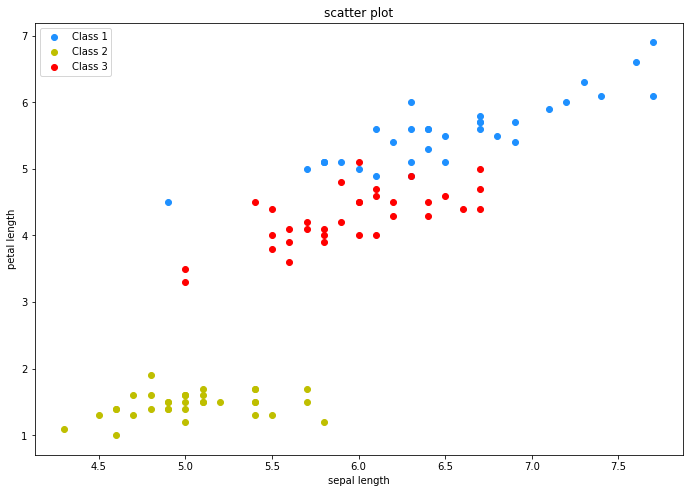

In [64]:
fig=plt.figure()
ax=fig.add_axes([0,0,1.5,1.5])
ax.scatter(class_1["sepal.length"], class_1["petal.length"], color='dodgerblue', label="Class 1")
ax.scatter(class_2["sepal.length"], class_2["petal.length"] , color='y', label="Class 2")
ax.scatter(class_3["sepal.length"], class_3["petal.length"] , color='r', label="Class 3")
ax.set_xlabel('sepal length')
ax.set_ylabel('petal length')
ax.set_title('scatter plot')
plt.legend(loc="upper left")


# Defining BubbleSort Function

In [65]:
#mapping virginica, setosa and versicolor as 1,2,3 respectively
test.variety=test.variety.map({"Virginica":1, "Setosa":2, "Versicolor":3})
train.variety=train.variety.map({"Virginica":1, "Setosa":2, "Versicolor":3})

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [66]:
def bubbleSort(array, target_label):
    for i in range(len(array)):
        for j in range(0, len(array) - i - 1):
            if array[j] > array[j + 1]:
                temp = array[j]
                array[j] = array[j+1]
                array[j+1] = temp

                temp = target_label[j]
                target_label[j] = target_label[j+1]
                target_label[j+1] = temp
    return array

In [67]:
def calculate_dist(x,y):
    global train    
    dist = []
    target_label = list(train['variety'])
    for i,j in zip(train['sepal.length'], train['petal.length']):
        dist.append(((i-x)**2 +(j-y)**2))        
    dist = bubbleSort(dist,target_label)
    return dist,target_label

In [68]:
distances = []
target_labels = []
for i,j in zip(test['sepal.length'], test['petal.length']):
    a, b = calculate_dist(i,j)
    distances.append(a)
    target_labels.append(b)

In [69]:
distances = np.array(distances)
distances.shape

(50, 100)

In [70]:
target_labels = np.array(target_labels)
target_labels.shape

(50, 100)

Taking User Input

# KNN Algorithm

In [71]:
k=input ("Enter value of k :")
k=int(k)
type(k)

Enter value of k :3


int

In [72]:
pred = [] #0,1,2

for i in range(len(test)):
    count_1, count_2,count_3 = 0,0,0
    for j in range(k):
        if target_labels[i][j] == 1:
            count_1 += 1
        elif target_labels[i][j] == 2:
            count_2 += 1
        elif target_labels[i][j] == 3:
            count_3 += 1
  
    if count_1 > count_2:
        pred.append(1)
    elif count_2 > count_3:
        pred.append(2)
    else:
        pred.append(3)

##4. Accuracy

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
test.head()

,sepal.length,petal.length,variety
100,6.8,4.8,3
101,5.3,1.5,2
102,5.2,3.9,3
103,6.1,4.7,3
104,5.5,4.0,3


In [75]:
y_test = list(test.variety)

In [76]:
correct_cnt = 0
for i in range(len(y_test)):
  if(pred[i]==y_test[i]):
    correct_cnt += 1
print('correctly predicted: ',correct_cnt, ' out of ', len(y_test))

correctly predicted:  47  out of  50


In [77]:
print('accuracy: ', correct_cnt*100/50, '%')

accuracy:  94.0 %


In [78]:
print(accuracy_score(y_test, pred))

0.94


#plot

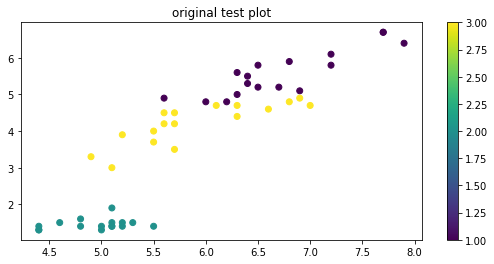

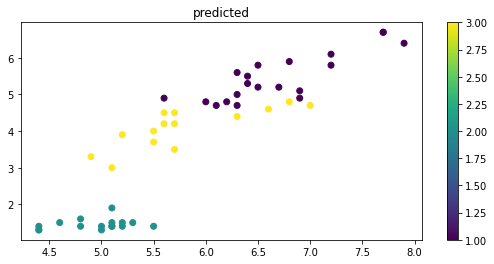

In [79]:
plt.figure(figsize=(9, 4))
plt.title('original test plot')
plt.scatter(test['sepal.length'], test['petal.length'], c=test['variety'])
plt.colorbar()
plt.show()

plt.figure(figsize=(9, 4))
plt.title('predicted')
plt.scatter(test['sepal.length'], test['petal.length'], c=pred)
plt.colorbar()
plt.show()